Now let's take a look at some Equities data, we'll go ahead and import some libs up front this time, grab the Amazon data into amazon_df and inspect the dtypes again

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

amazon_df = pd.read_csv('solutions/downloaded/AMZN.csv')
print(amazon_df.head())
print(amazon_df.dtypes)

         Date      Date.1     Open     High      Low  Adj. Close   Volume
0  2018-10-05  2018-10-05  1917.99  1929.08  1862.83     1889.65  6822327
1  2018-10-04  2018-10-04     1949     1956  1896.57     1909.42  7256973
2  2018-10-03  2018-10-03   1981.7   1989.7  1949.81     1952.76  5253131
3  2018-10-02  2018-10-02  1999.99  2013.39  1965.77     1971.31  5400749
4  2018-10-01  2018-10-01  2021.99  2033.19   2003.6     2004.36  3468285
Date           object
Date.1         object
Open           object
High           object
Low            object
Adj. Close    float64
Volume         object
dtype: object


..and pull in our function from the last notebook to force the columns to numeric, note it still prints the bad rows:

In [2]:
def make_numeric( df, col_name ):
    ''' takes a dataframe and a column name and makes the column numeric, setting bad values to NaN '''
    series_as_numbers = pd.to_numeric( df[ col_name ], errors='coerce' )
    bad_index = series_as_numbers.isna()
    print( df[ bad_index ] )
    df[ col_name ] = series_as_numbers
    return df

for bad_column in [ 'Open', 'High', 'Low', 'Volume' ]:
    amazon_df = make_numeric( amazon_df, bad_column )
    
print( amazon_df.head() )
print( amazon_df.dtypes )

            Date      Date.1  \
611   1999-05-04  1999-05-04   
1817  2011-07-19  2011-07-19   
3519  2004-10-15  2004-10-15   
4145  2002-04-23  2002-04-23   

                                                   Open         High      Low  \
611   ERROR PROCESSING UNIT ERROR IN RECORDING ERROR...          NaN      NaN   
1817                                            s213.77        218.4   213.77   
3519                                    3929x39.6737.88  38.5snorkel  8205600   
4145                                           14..`.35        14.75    13.88   

      Adj. Close   Volume  
611          NaN      NaN  
1817      218.06  4438956  
3519         NaN      NaN  
4145       14.06  8141800  
            Date      Date.1  Open         High      Low  Adj. Close Volume
611   1999-05-04  1999-05-04   NaN          NaN      NaN         NaN    NaN
3519  2004-10-15  2004-10-15   NaN  38.5snorkel  8205600         NaN    NaN
           Date      Date.1   Open   High      Low  Adj. Close   

Now that we know our data is all float64s we can use the .describe() method on the DataFrame to get some interesting stats on each column. This is often a good starting point for looking for outliers or outrageous data points:

In [3]:
print( amazon_df.describe() )

                Open           High           Low     Adj. Close        Volume
count    4241.000000    4243.000000  4.243000e+03    4243.000000  4.242000e+03
mean      321.602386     332.620771  2.226238e+03     321.513615  6.931896e+06
std      1588.942852    2252.530697  1.259681e+05    1730.223077  2.936321e+07
min         9.600000       9.850000  9.030000e+00       9.130000  0.000000e+00
25%        43.200000      43.955000  4.260000e+01      43.315000  3.590560e+06
50%       129.250000     130.960000  1.275500e+02     129.260000  5.387404e+06
75%       337.000000     339.770000  3.330450e+02     335.420000  7.766975e+06
max    100092.010000  144700.000000  8.205600e+06  110005.280000  1.888477e+09


Hmmm. Look at the 'Open' column now. 4241 entries, with a mean of 321.60 but the standard deviation is > 1000, and there's a maximum price of 100,092.01 (don't forget that extra cent!) Something is fishy. Let's plot AMZN's Open prices to get a visual aid.

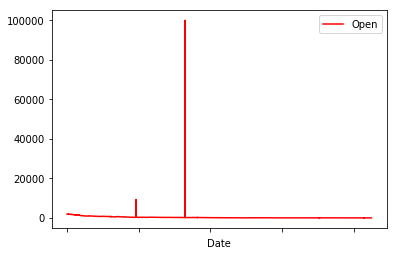

In [4]:
amazon_df.plot( kind = 'line', x='Date', y='Open', color = 'red' )
plt.show()

Ok, so we have two very obvious outliers, they are clearly skewing the entire plot. From a glance over to the Y-axis we can decide on 5000 as a reasonable number to filter on. Without descending into too deep an explanation of boolean selection on DataFrames, the following statement allows us to 'filter' a DataFrame by selecting rows that satisfy a given condition. In this instance we want all rows where 'Open' is > 5000.

In [5]:
amazon_df[amazon_df['Open'] > 5000]

,Date,Date.1,Open,High,Low,Adj. Close,Volume
962,2014-12-10,2014-12-10,9312.00,313.19,304.68,305.84,3245890.0
1645,2012-03-23,2012-03-23,100092.01,196.20,191.80,195.04,5984094.0


Just the two outliers. On their own, there's not enough context, so let's take the first row (962) and let's look at neighboring rows to see if we can figure out what's wrong. If you pass a slice index to a DataFrame, then just like a python list, you get back the 'slice' of rows you asked for:

In [6]:
amazon_df[960:965]

,Date,Date.1,Open,High,Low,Adj. Close,Volume
960,2014-12-12,2014-12-12,303.99,310.64,303.01,307.32,3162322.0
961,2014-12-11,2014-12-11,307.89,312.64,306.01,307.36,3272919.0
962,2014-12-10,2014-12-10,9312.00,313.19,304.68,305.84,3245890.0
963,2014-12-09,2014-12-09,302.99,313.64,301.14,312.50,4049506.0
964,2014-12-08,2014-12-08,311.57,316.56,304.82,306.64,3639180.0


So 9312 is clearly wrong, and should, looking at the neighboring figures, be 312. We can use the .at[ row, col ] call on the DataFrame to fix this value:

In [7]:
amazon_df.at[ 962, 'Open' ] = 312.0
amazon_df[960:965]

,Date,Date.1,Open,High,Low,Adj. Close,Volume
960,2014-12-12,2014-12-12,303.99,310.64,303.01,307.32,3162322.0
961,2014-12-11,2014-12-11,307.89,312.64,306.01,307.36,3272919.0
962,2014-12-10,2014-12-10,312.00,313.19,304.68,305.84,3245890.0
963,2014-12-09,2014-12-09,302.99,313.64,301.14,312.50,4049506.0
964,2014-12-08,2014-12-08,311.57,316.56,304.82,306.64,3639180.0


Way better! Now to look at the other rogue value, in context:

In [8]:
amazon_df[1643:1648]

,Date,Date.1,Open,High,Low,Adj. Close,Volume
1643,2012-03-27,2012-03-27,203.59,209.85,202.88,205.44,9600734.0
1644,2012-03-26,2012-03-26,196.48,202.97,195.50,202.87,7620695.0
1645,2012-03-23,2012-03-23,100092.01,196.20,191.80,195.04,5984094.0
1646,2012-03-22,2012-03-22,190.54,194.06,190.26,192.40,3740279.0
1647,2012-03-21,2012-03-21,192.50,194.28,191.26,191.73,4215499.0


Those three 0s look like some line noise has corrupted that number, it should be 192.01

In [10]:
amazon_df.at[ 1645, 'Open' ] = 192.01

Now let's redo our plot and see what's what:

<Figure size 432x288 with 0 Axes>

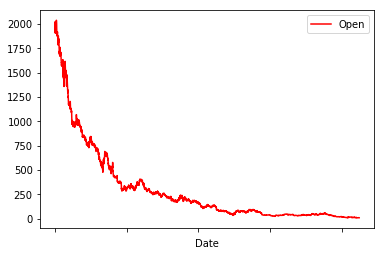

In [11]:
plt.clf()
amazon_df.plot( kind='line', x='Date', y='Open', color='red' )
plt.show()

Much cleaner - but our dates are still 'objects' i.e. Strings, and they run in reverse order. Let's turn them into proper datetime objects and then use sort_values() to fix this:

In [12]:
from datetime import datetime
amazon_df['Date'] = [ datetime.strptime( x, '%Y-%m-%d' ) for x in amazon_df['Date'] ]

<Figure size 432x288 with 0 Axes>

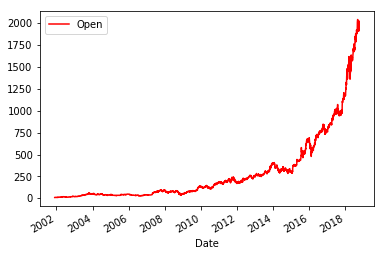

In [13]:
amazon_df.sort_values('Date', inplace=True)
plt.clf()
amazon_df.plot( kind='line', x='Date', y='Open', color='red' )
plt.show()

So now we have clean Open prices for Amazon, in proper date order, with no outliers. Let's use describe() again to check the other columns:

In [14]:
amazon_df.describe()

,Open,High,Low,Adj. Close,Volume
count,4241.000000,4243.000000,4.243000e+03,4243.000000,4.242000e+03
mean,295.924480,332.620771,2.226238e+03,321.513615,6.931896e+06
std,396.670719,2252.530697,1.259681e+05,1730.223077,2.936321e+07
min,9.600000,9.850000,9.030000e+00,9.130000,0.000000e+00
25%,43.200000,43.955000,4.260000e+01,43.315000,3.590560e+06
50%,129.250000,130.960000,1.275500e+02,129.260000,5.387404e+06
75%,336.030000,339.770000,3.330450e+02,335.420000,7.766975e+06
max,2038.110000,144700.000000,8.205600e+06,110005.280000,1.888477e+09


So now, High, Low, Adjusted Close all have some dodgy max values and large deviations, like before we want a more generic function. There are ways to add code to fix or drop these rows automatically but for the scope of this talk we'll just write a function to help us find them:

In [15]:
def find_bad_prices( df, column_name, cutoff ):
    ''' takes a DataFrame, column_name and a cutoff and returns a DataFrame of bad values '''
    return df[df[ column_name ] > cutoff ]

find_bad_prices( amazon_df, 'High', 3000 )

,Date,Date.1,Open,High,Low,Adj. Close,Volume
121,2018-04-16,2018-04-16,1445.0,144700.0,1427.48,1441.5,2808624.0


In [16]:
amazon_df.at[ 121, 'High' ] = 1447.0
find_bad_prices( amazon_df, 'Low', 3000 )

,Date,Date.1,Open,High,Low,Adj. Close,Volume
3519,2004-10-15,2004-10-15,NaN,NaN,8205600.0,NaN,NaN


In [17]:
amazon_df.drop(3519, inplace=True)
find_bad_prices( amazon_df, 'Adj. Close', 3000)

,Date,Date.1,Open,High,Low,Adj. Close,Volume
234,2017-10-31,2017-10-31,1109.0,1110.54,1101.12,110005.28,3476967.0


In [18]:
amazon_df.at[ 234, 'Adj. Close' ] = 1105.28
amazon_df.describe()

,Open,High,Low,Adj. Close,Volume
count,4241.000000,4243.000000,4242.000000,4243.000000,4.242000e+03
mean,295.924480,298.858574,292.392308,295.847813,6.931896e+06
std,396.670719,399.765894,392.575583,396.366945,2.936321e+07
min,9.600000,9.850000,9.030000,9.130000,0.000000e+00
25%,43.200000,43.955000,42.595000,43.315000,3.590560e+06
50%,129.250000,130.960000,127.480000,129.260000,5.387404e+06
75%,336.030000,339.770000,332.935000,335.420000,7.766975e+06
max,2038.110000,2050.500000,2013.000000,2039.510000,1.888477e+09


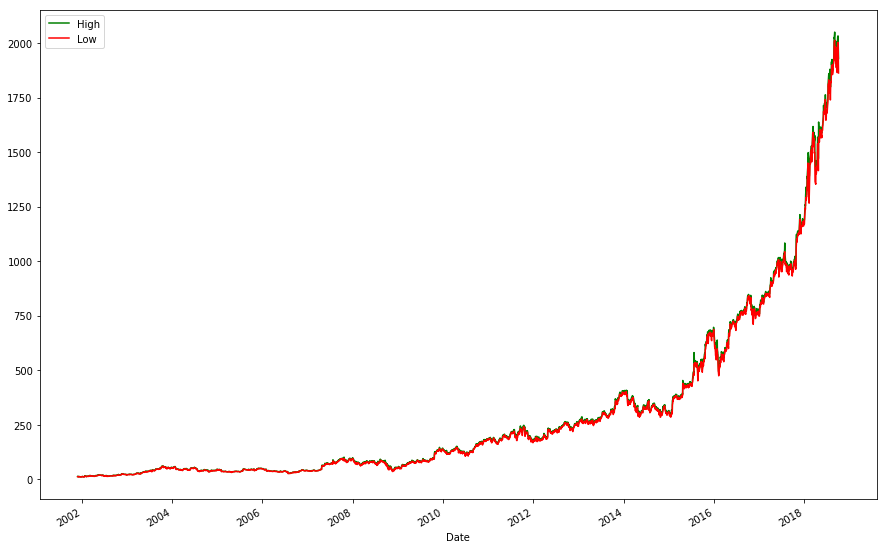

In [20]:
plt.clf()
plt.rcParams['figure.figsize'] = [15, 10]
ax = plt.gca()
amazon_df.plot( kind='line', x = 'Date', y = 'High', color='green', ax = ax )
amazon_df.plot( kind='line', x = 'Date', y = 'Low',  color='red',   ax = ax )
plt.show()